# Technical Exercise
### Candidate: Sheny C. Lin
### Date: 10/18/2023

## Creating a new dataset using SQL

In [ ]:
# Install necessary libraries: SQLite has been installed

In [ ]:
# Import necessary libraries
import sqlite3
import pandas as pd

In [ ]:
# Connect to the database
# For SQLite, if the database doesn't exist, it will be created
# So I can either specify a filename, or create one if it's not already existed
conn = sqlite3.connect('student_grades.db')

In [ ]:
# Create a new table with 3 columns: Name, Grade and Mark 
c = conn.cursor()
c.execute('''CREATE TABLE Students (ID integer, Name text, Marks integer)''') 
c.execute('''CREATE TABLE Grades (Grade integer, Min_Mark integer, Max_Mark integer)''')
conn.commit()

In [ ]:
# Question 1 
# Select "Name" and "Marks" from Students (s) table; and "Grade" from Grades(g) table 
# We only want name of student who received grade no lower than 8
# Show students names in descending order by "Grade", and order those students by "Name" 

query = """
SELECT s.Name, g.Grade, s.Marks   
FROM Students s
JOIN Grades g ON s.Marks BETWEEN g.Min_Mark AND g.Max_Mark
WHERE g.Grade >= 8
ORDER BY g.Grade DESC, s.Name ASC
"""

df = pd.read_sql_query(query, conn)
display(df)

In [ ]:
# Question 2
# Use "AVG" to learn the average grade of all student and name the table as "Average_Grade"
# Join two tables on the condition where a grade in the "Grades" table 
# where the student's marks fall between the "Min_Mark" and "Max_Mark" for that grade

# For example, if a student has a mark of 85
# and the Grades table specifies that a grade of 9 corresponds to marks between 80 and 89, 
# then that student's row will be combined with the row for grade 9 from the Grades table.

query = """
SELECT AVG(g.Grade) AS Average_Grade
FROM Students s
JOIN Grades g ON s.Marks BETWEEN g.Min_Mark AND g.Max_Mark;
"""

df = pd.read_sql_query(query, conn)
display(df)

In [ ]:
# Question 3 
# Select ID, Name, Marks from "Students"
# Show student(s) with the maximun marks

query = """
SELECT ID, Name, Marks
FROM Students
WHERE Marks = (SELECT MAX(Marks) FROM Students);
"""

df = pd.read_sql_query(query, conn)
display(df)

## Creating a new dataset using Pandas

In [1]:
import pandas as pd

# There're two tables, one containing all customer info is "customer" dataset
# The other containing all satisfaction rating is "satisfaction" dataset

# Read those files using Pandas
customer = pd.read_csv('customer.csv')
satisfaction = pd.read_csv('satisfaction.csv')

In [2]:
# Handle unwanted columns
customer = customer.drop('Unnamed: 0', axis=1)
satisfaction = satisfaction.drop('Unnamed: 0', axis=1)

# Replace space with _
customer.columns = [c.replace(' ', '_') for c in customer.columns]
satisfaction.columns = [c.replace(' ', '_') for c in satisfaction.columns]

In [3]:
# Check NA values
customer.isna().sum()

id                 0
Gender             0
Customer_Type      0
Age                0
Type_of_Travel     0
Class              0
Flight_Distance    0
dtype: int64

In [4]:
satisfaction.isna().sum()

id                                     0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online_booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction                           0
dtype: int64

In [5]:
# Impute NA with mean value
satisfaction['Arrival_Delay_in_Minutes'] = satisfaction['Arrival_Delay_in_Minutes'].fillna(satisfaction['Arrival_Delay_in_Minutes'].mean())
satisfaction.isna().sum()

id                                   0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [6]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               103904 non-null  int64 
 1   Gender           103904 non-null  object
 2   Customer_Type    103904 non-null  object
 3   Age              103904 non-null  int64 
 4   Type_of_Travel   103904 non-null  object
 5   Class            103904 non-null  object
 6   Flight_Distance  103904 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 5.5+ MB


In [7]:
customer.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460
1,5047,Male,disloyal Customer,25,Business travel,Business,235
2,110028,Female,Loyal Customer,26,Business travel,Business,1142
3,24026,Female,Loyal Customer,25,Business travel,Business,562
4,119299,Male,Loyal Customer,61,Business travel,Business,214


In [8]:
satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Inflight_wifi_service              103904 non-null  int64  
 2   Departure/Arrival_time_convenient  103904 non-null  int64  
 3   Ease_of_Online_booking             103904 non-null  int64  
 4   Gate_location                      103904 non-null  int64  
 5   Food_and_drink                     103904 non-null  int64  
 6   Online_boarding                    103904 non-null  int64  
 7   Seat_comfort                       103904 non-null  int64  
 8   Inflight_entertainment             103904 non-null  int64  
 9   On-board_service                   103904 non-null  int64  
 10  Leg_room_service                   103904 non-null  int64  
 11  Baggage_handling                   1039

In [9]:
satisfaction.head()

,id,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [10]:
# Join tables on the primary key "id"
joint_df = pd.merge(customer, satisfaction, on='id', how='inner')

In [11]:
joint_df.head()

,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [12]:
# Question 1:
# We don't want the name of any customer who's **Flight Distance** is lower than 1000. 
# Also, this report must be in descending order by **Flight Distance**. 
# In addition, if there's more than one customer with the same Flight Distance, 
# order those by their **Arrival Delay in Minutes**.

filtered_df = joint_df[joint_df['Flight_Distance'] >= 1000]
sorted_df = filtered_df.sort_values(by=['Flight_Distance', 'Arrival_Delay_in_Minutes'], ascending=[False, True])
final_table = sorted_df[['id', 'Customer_Type', 'Gender', 'Flight_Distance', 'Arrival_Delay_in_Minutes']]
print(final_table)

          id      Customer_Type  Gender  Flight_Distance  \
2847   31870     Loyal Customer  Female             4983   
18434  31876     Loyal Customer  Female             4983   
19755  31871     Loyal Customer  Female             4983   
33094  31878     Loyal Customer  Female             4983   
46848  31812     Loyal Customer    Male             4983   
...      ...                ...     ...              ...   
78405  56172  disloyal Customer  Female             1000   
43779  54179     Loyal Customer  Female             1000   
88530  56173  disloyal Customer  Female             1000   
91056  54174     Loyal Customer    Male             1000   
1717   56174     Loyal Customer    Male             1000   

       Arrival_Delay_in_Minutes  
2847                        0.0  
18434                       0.0  
19755                       0.0  
33094                       0.0  
46848                       0.0  
...                         ...  
78405                      23.0  
43779  

## Learn about our loyalty customers

In [13]:
# Question 2:
# Calculate the average **Arrival_Delay_in_Minutes** for all combinations of "Customer_Type" and "satisfaction"

# Group by Customer_Type and satisfaction to calculate the average delay
average_delays = joint_df.groupby(['Customer_Type', 'satisfaction'])['Arrival_Delay_in_Minutes'].mean().reset_index()

# Round the results to 2 decimal places
average_delays['Arrival_Delay_in_Minutes'] = average_delays['Arrival_Delay_in_Minutes'].round(2)

# Print the results
for index, row in average_delays.iterrows():
    print(f"Average arrival delay time (in minutes) for '{row['Customer_Type']}' who are '{row['satisfaction']}': {row['Arrival_Delay_in_Minutes']} minutes")

Average arrival delay time (in minutes) for 'Loyal Customer' who are 'neutral or dissatisfied': 17.33 minutes
Average arrival delay time (in minutes) for 'Loyal Customer' who are 'satisfied': 12.64 minutes
Average arrival delay time (in minutes) for 'disloyal Customer' who are 'neutral or dissatisfied': 16.48 minutes
Average arrival delay time (in minutes) for 'disloyal Customer' who are 'satisfied': 12.62 minutes


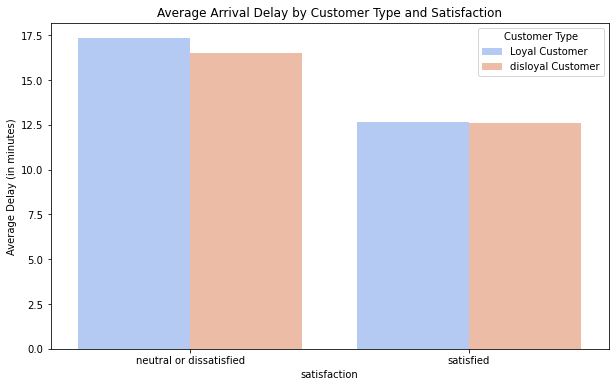

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute average delays grouped by Customer_Type and satisfaction
average_delays = joint_df.groupby(['Customer_Type', 'satisfaction'])['Arrival_Delay_in_Minutes'].mean().reset_index()

# Filter only for 'satisfied' and 'neutral or dissatisfied'
average_delays = average_delays[average_delays['satisfaction'].isin(['satisfied', 'neutral or dissatisfied'])]

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(data=average_delays, 
            x='satisfaction', 
            y='Arrival_Delay_in_Minutes', 
            hue='Customer_Type', 
            palette="coolwarm")
plt.title('Average Arrival Delay by Customer Type and Satisfaction')
plt.ylabel('Average Delay (in minutes)')
plt.legend(title='Customer Type')
plt.show()

In [15]:
# Question 3: Find the **id**, **Age**, and the **Flight_Distance** of customer(s) 
# who reached the longest **Flight_Distance**.
# The result set should only display the customer(s) with the longest **Flight_Distance**.

# Sorting the df based on Flight Distance in descending order
sorted_df = joint_df.sort_values(by='Flight_Distance', ascending=False)

# Getting the top row(s)
longest_flight_distance = sorted_df['Flight_Distance'].iloc[0]
top_customers = sorted_df[sorted_df['Flight_Distance'] == longest_flight_distance]

# Displaying the desired columns
result = top_customers[['id', 'Age', 'Flight_Distance']]
print(result)

          id  Age  Flight_Distance
95982  31881   62             4983
79574  31817   38             4983
80746  31879   47             4983
18434  31876   31             4983
74837  31813   37             4983
46848  31812   42             4983
19755  31871   50             4983
33094  31878   29             4983
2847   31870   63             4983
67767  31880   67             4983
64791  31873   50             4983
64631  31875   52             4983


## Using heatmap to understand customer 

<AxesSubplot:xlabel='Class', ylabel='satisfaction'>

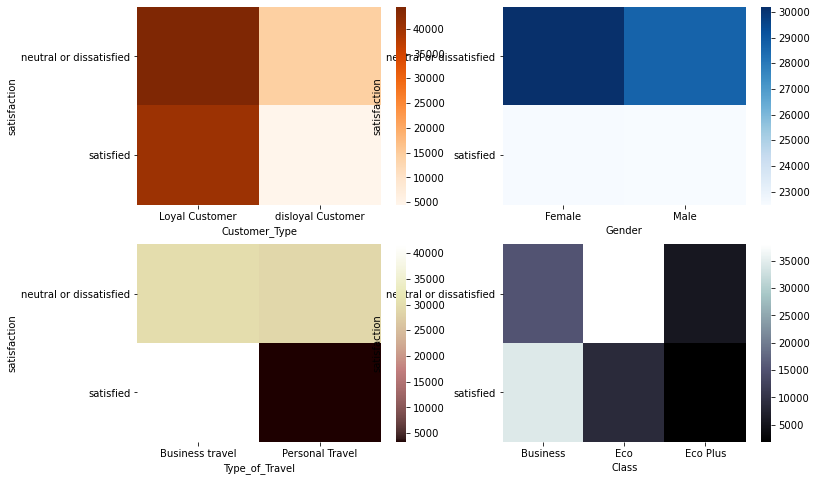

In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(satisfaction['satisfaction'], customer['Customer_Type'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(satisfaction['satisfaction'], customer['Gender'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(satisfaction['satisfaction'], customer['Type_of_Travel'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(satisfaction['satisfaction'], customer['Class'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])

Dataset found on Kaggle: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction